# **Harry Potter Movies Dataset EDA**

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Movies.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Data_Dictionary.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/LICENSE
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Places.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Spells.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Chapters.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Dialogue.csv


In [2]:
hp_characters=pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv", encoding="ISO-8859-1")
hp_movies=pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Movies.csv", encoding="ISO-8859-1")
hp_spells=pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Spells.csv", encoding="ISO-8859-1")
hp_characters               


,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
...,...,...,...,...,...,...,...,...
161,162,Waiter,NaN,NaN,NaN,NaN,NaN,NaN
162,163,Boy 2,NaN,NaN,NaN,NaN,NaN,NaN
163,164,Crowd,NaN,NaN,NaN,NaN,NaN,NaN
164,165,Gryffindors,NaN,NaN,NaN,NaN,NaN,NaN


# **Characters**

## **Data cleaning**

In [3]:
hp_characters.isnull().sum()

Character ID        0
Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

In [4]:
hp_characters=hp_characters[["Character Name","Species" ,"Gender" ,"House"]]
hp_characters.describe(include='all') 

,Character Name,Species,Gender,House
count,166,125,125,75
unique,166,13,3,6
top,Harry Potter,Human,Male,Gryffindor
freq,1,104,82,31


## **Visualizing Missing Values in Dataset**

<AxesSubplot:>

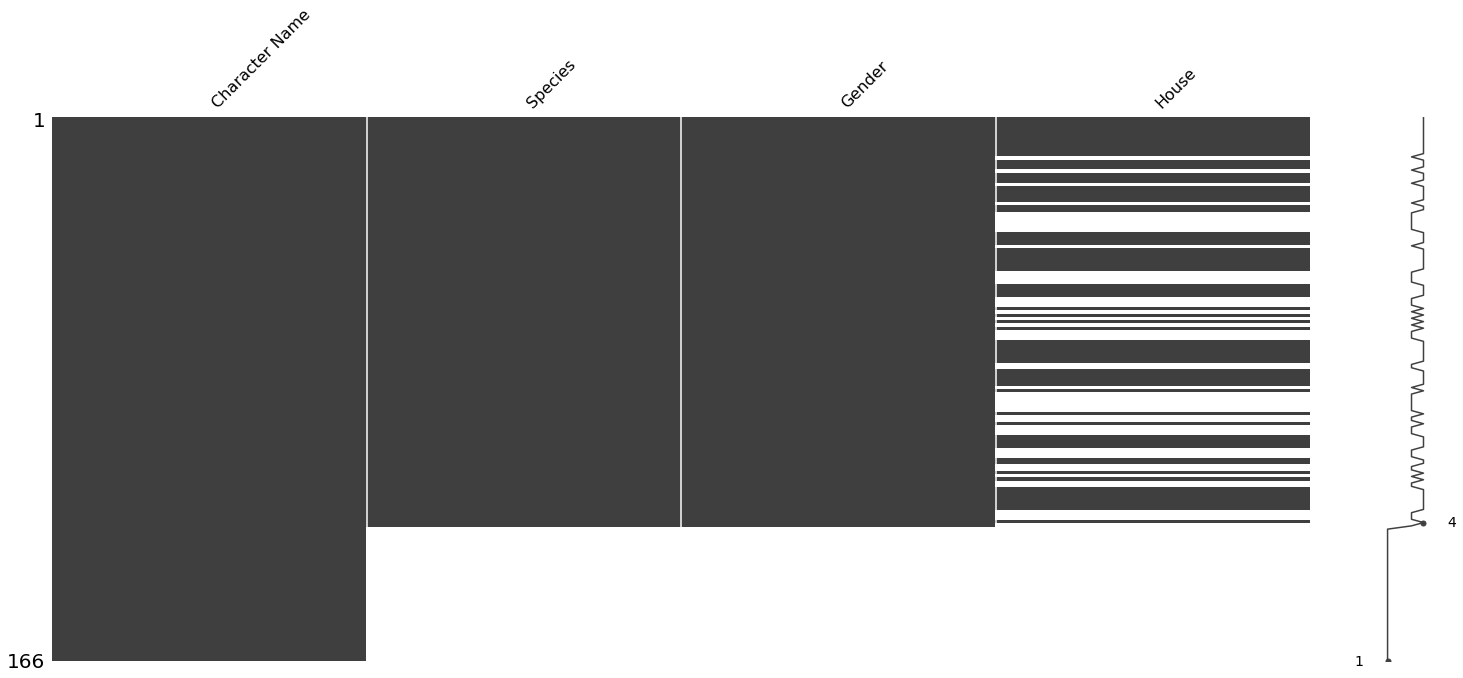

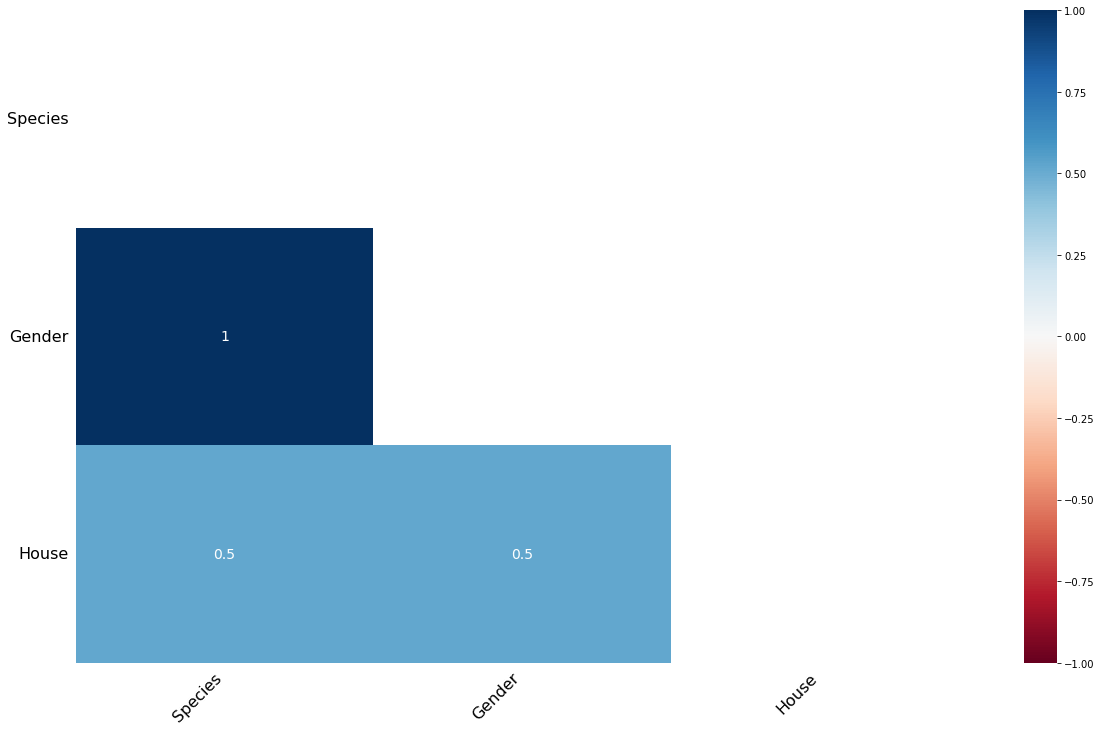

In [5]:
# Program to visualize missing values in dataset
  
# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(hp_characters)

# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(hp_characters)

A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

## **Remove Missing Entries**

In [6]:
hp_characters=hp_characters.dropna(subset=['Gender','Species'], axis=0)
hp_characters

,Character Name,Species,Gender,House
0,Harry Potter,Human,Male,Gryffindor
1,Ron Weasley,Human,Male,Gryffindor
2,Hermione Granger,Human,Female,Gryffindor
3,Albus Dumbledore,Human,Male,Gryffindor
4,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor
...,...,...,...,...
120,Charity Burbage,Human,Female,NaN
121,Dilys Derwent,Human,Female,NaN
122,Eldred Worple,Human,Male,NaN
123,Marcus Belby,Human,Male,Ravenclaw


## **Descriptive Statistics**

In [7]:
hp_characters=hp_characters[["Character Name","Species" ,"Gender" ,"House"]]
hp_characters.describe(include='all') 

,Character Name,Species,Gender,House
count,125,125,125,75
unique,125,13,3,6
top,Harry Potter,Human,Male,Gryffindor
freq,1,104,82,31


## **Data Visualization**

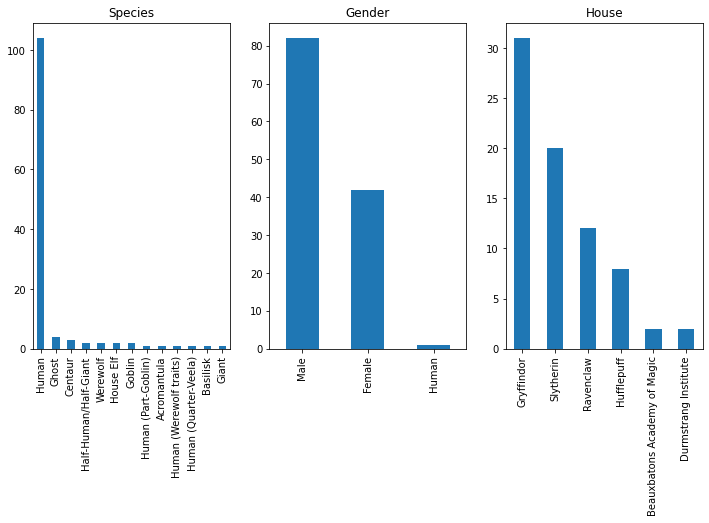

In [8]:
plt.rcParams["figure.figsize"] = [12.0, 6.0]
categorical_features = ["Species", "Gender","House"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(hp_characters[categorical_features]):
    hp_characters[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

## **Is there a significant relationship between variables?**

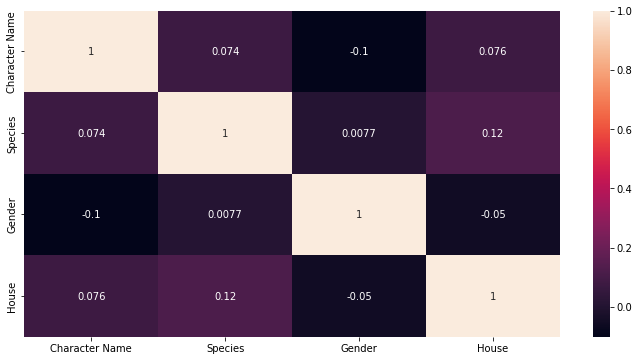

In [9]:
import seaborn as sn
hp_characters=hp_characters[["Character Name","Species" ,"Gender" ,"House"]]
cols = ["Character Name","Species" ,"Gender" ,"House"]
hp_characters[["Species","House","Character Name","Gender"]]=hp_characters[["Species","House","Character Name","Gender"]].astype('category')
hp_characters["Species"]=hp_characters["Species"].cat.codes
hp_characters["Character Name"]=hp_characters["Character Name"].cat.codes
hp_characters["Gender"]=hp_characters["Gender"].cat.codes
hp_characters["House"]=hp_characters["House"].cat.codes


corrMatrix = hp_characters.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# **Movies**
## **Add Profit Column to Dataframe**

In [10]:
hp_movies["Budget"]=hp_movies["Budget"].astype('string').replace({'\$':'', ',':''}, regex = True).astype(int)
hp_movies["Box Office"]=hp_movies["Box Office"].astype('string').replace({'\$':'', ',':''}, regex = True).astype(int)
hp_movies["Profit"]=hp_movies["Box Office"]-hp_movies["Budget"]
hp_movies

,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Profit
0,1,Harry Potter and the Philosopher's Stone,2001,152,125000000,1002000000,877000000
1,2,Harry Potter and the Chamber of Secrets,2002,161,100000000,880300000,780300000
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,130000000,796700000,666700000
3,4,Harry Potter and the Goblet of Fire,2005,157,150000000,896400000,746400000
4,5,Harry Potter and the Order of the Phoenix,2007,138,150000000,942000000,792000000
5,6,Harry Potter and the Half-Blood Prince,2009,153,250000000,943200000,693200000
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,200000000,976900000,776900000
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,250000000,1342000000,1092000000


## **Which Harry Potter films made the most money?**

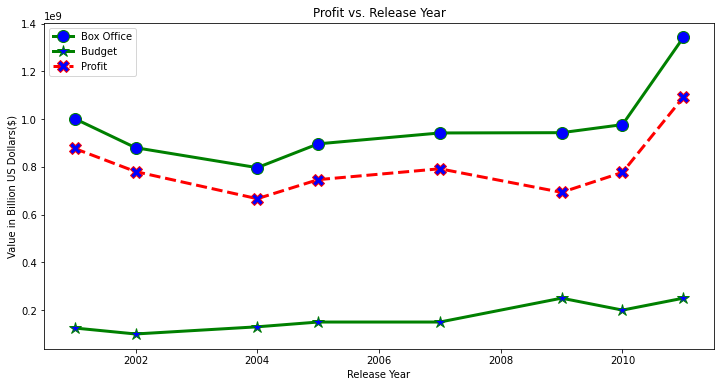

In [11]:
# plotting the points
plt.plot(hp_movies["Release Year"],hp_movies["Box Office"], color='green', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.plot(hp_movies["Release Year"],hp_movies["Budget"], color='green', linewidth = 3,
         marker='*', markerfacecolor='blue', markersize=12) 
plt.plot(hp_movies["Release Year"],hp_movies["Profit"], color='red', linestyle='dashed', linewidth = 3,
         marker='X', markerfacecolor='blue', markersize=12) 
 
# naming the x axis
plt.xlabel('Release Year')
# naming the y axis
plt.ylabel('Value in Billion US Dollars($)')
 
# giving a title to my graph
plt.title('Profit vs. Release Year')
 
# function to show the plot
plt.legend(["Box Office", "Budget","Profit"], loc ="upper left")
plt.show()

### **The first one and the last one!!**

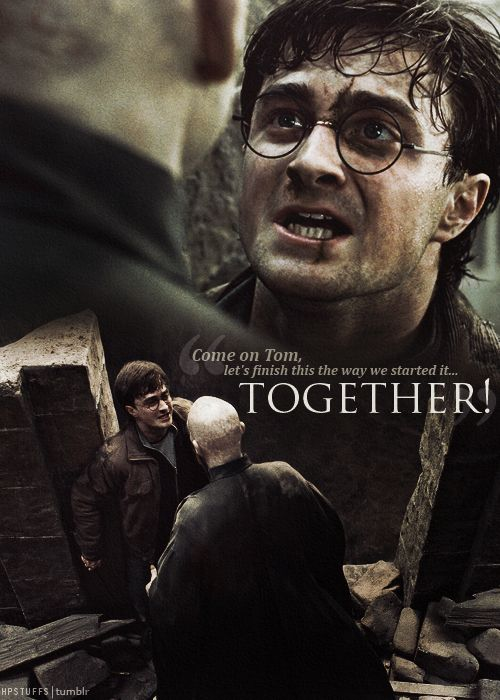

# **Spells**

In [12]:
hp_spells.describe(include='all')

,ï»¿Spell ID,Incantation,Spell Name,Effect,Light
count,61.000000,61,61,61,40
unique,NaN,61,61,61,17
top,NaN,Accio,Summoning Charm,Summons an object,Blue
freq,NaN,1,1,1,7
mean,31.000000,NaN,NaN,NaN,NaN
std,17.752934,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,16.000000,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN
75%,46.000000,NaN,NaN,NaN,NaN


## **Does the color of light give a clue about the purpose of wizards?**

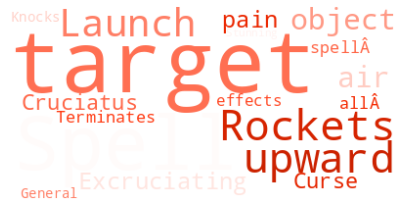

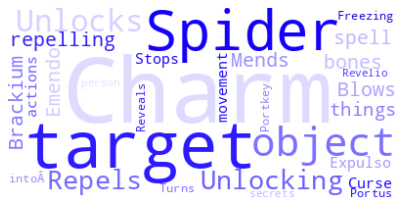

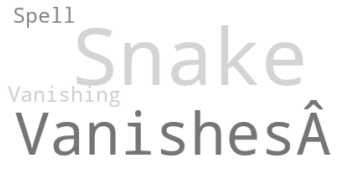

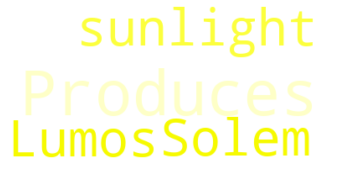

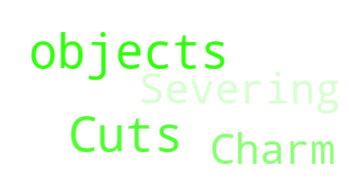

In [13]:

def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(40, 100)
def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(245, 100%%, %d%%)" % random.randint(40, 100)
def black_smoke_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(178, 0%%, %d%%)" % random.randint(40, 100)
def bright_yellow_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(61, 100%%, %d%%)" % random.randint(40, 100)
def light_green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(111, 100%%, %d%%)" % random.randint(40, 100)


hp_spells["Spell Name"]=hp_spells["Spell Name"].astype('string')
hp_spells['Spell Name and Effect'] = hp_spells.Effect.str.cat(hp_spells["Spell Name"],sep=" ")


hp_spells_red=hp_spells[hp_spells["Light"].isin(["Red"])]
text = " ".join(i for i in hp_spells_red["Spell Name and Effect"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, mode="RGBA", background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=7), interpolation='bilinear')
plt.axis("off")
plt.show()

hp_spells_blue=hp_spells[hp_spells["Light"].isin(["Blue"])]
text = " ".join(i for i in hp_spells_blue["Spell Name and Effect"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, mode="RGBA", background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud.recolor(color_func=blue_color_func, random_state=7), interpolation='bilinear')
plt.axis("off")
plt.show()

hp_spells_black=hp_spells[hp_spells["Light"].isin(["Black smoke"])]
text = " ".join(i for i in hp_spells_black["Spell Name and Effect"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, mode="RGBA", background_color="white").generate(text)
plt.figure( figsize=(6,6))
plt.imshow(wordcloud.recolor(color_func=black_smoke_color_func, random_state=7), interpolation='bilinear')
plt.axis("off")
plt.show()

hp_spells_yellow=hp_spells[hp_spells["Light"].isin(["Bright yellow"])]
text = " ".join(i for i in hp_spells_yellow["Spell Name and Effect"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, mode="RGBA", background_color="white").generate(text)
plt.figure( figsize=(6,6))
plt.imshow(wordcloud.recolor(color_func=bright_yellow_color_func, random_state=7), interpolation='bilinear')
plt.axis("off")
plt.show()


hp_spells_green=hp_spells[hp_spells["Light"].isin(["Light green"])]
text = " ".join(i for i in hp_spells_green["Spell Name and Effect"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, mode="RGBA", background_color="white").generate(text)
plt.figure( figsize=(6,6))
plt.imshow(wordcloud.recolor(color_func=light_green_color_func, random_state=7), interpolation='bilinear')
plt.axis("off")
plt.show()



-

-

-

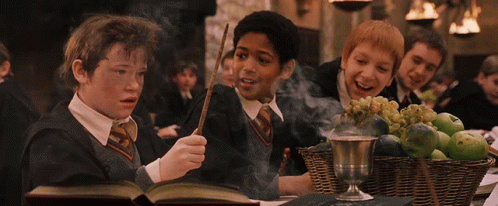 